# 1.환경설정과 로봇배제 기준

## 가. 한글폰트 설치

In [1]:
!cat /etc/issue

Ubuntu 20.04.5 LTS \n \l



In [2]:
# Colab 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
mpl.font_manager.fontManager.addfont('NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

--2023-03-19 07:41:31--  https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf [following]
--2023-03-19 07:41:31--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343844 (4.1M) [application/octet-stream]
Saving to: ‘NanumGothic.ttf’

NanumGothic.ttf     100%[===================>]   4.14M  --.-KB/s    in 0.08s   

2023-03-19 07:41:32 (54.6 MB/s) - ‘NanumGothic.ttf’ saved [4343844/4343844]



<Axes: title={'center': '한글'}>

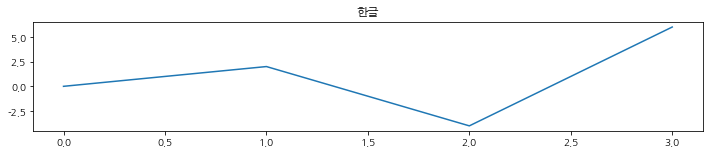

In [3]:
#확인코드
import pandas as pd
pd.Series([0,2,-4,6]).plot(title="한글", figsize=(12, 2))

## 나. 로봇 배제 표준

웹 크롤링 로봇의 접근을 허락하고 있는지 배제하고 있는지 사전에 확인이 필요함

아래와 같은 방법으로 하던지 웹브라우저를 이용해 웹사이트 주소에 robots.txt를 추가해서 엔터 해본다.

In [4]:
import requests

urls = ["https://www.naver.com/", "https://www.python.org/", "https://www.tistory.com/"]
filename= "robots.txt"

for url in urls:
    file_path = url + filename
    print(file_path)
    resp = requests.get(file_path)
    print(resp.text)
    print("\n")

https://www.naver.com/robots.txt
User-agent: *
Disallow: /
Allow : /$ 



https://www.python.org/robots.txt
# Directions for robots.  See this URL:
# http://www.robotstxt.org/robotstxt.html
# for a description of the file format.

User-agent: HTTrack
User-agent: puf
User-agent: MSIECrawler
Disallow: /

# The Krugle web crawler (though based on Nutch) is OK.
User-agent: Krugle
Allow: /
Disallow: /~guido/orlijn/
Disallow: /webstats/

# No one should be crawling us with Nutch.
User-agent: Nutch
Disallow: /

# Hide old versions of the documentation and various large sets of files.
User-agent: *
Disallow: /~guido/orlijn/
Disallow: /webstats/



https://www.tistory.com/robots.txt
User-agent: *
Disallow: /m
Disallow: /login
Disallow: /gateway
Allow: /




/$은 첫페이지만 크롤링 허용하고

파이썬 홈페이지는 일부 로봇의 접근 불허

# 2.Pytrends를 이용한 트렌드 검색

구글 검색 횟수 제공 API 활용 라이브러리 

pytrends 코드 설치: https://pypi.org/project/pytrends/

In [5]:
#기존 비공식적으로 배포되던 pytrends는 유료로 변경되어 조회가 한정됨
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


pytrends 서비스 API

* Google 계정을 만듭니다. 이미 계정이 있다면 이 단계를 건너뛰세요.
* Google Trends 웹사이트(https://trends.google.com)로 이동하고 페이지 왼쪽 상단에 있는 "탐색" 버튼을 클릭합니다.
* 검색 바에 검색어 또는 토픽을 입력하고 "Enter"를 클릭합니다.

# 3.크롤링시 Find문과 Select문 활용

In [6]:
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/html%EC%97%B0%EC%8A%B5.html

--2023-03-19 07:41:45--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/html%EC%97%B0%EC%8A%B5.html
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 564 [text/plain]
Saving to: ‘html연습.html’

html연습.html       100%[===================>]     564  --.-KB/s    in 0s      

2023-03-19 07:41:45 (23.8 MB/s) - ‘html연습.html’ saved [564/564]



In [7]:
#HTML문서 파싱 
from bs4 import BeautifulSoup as bs
with open('html연습.html','r') as f:
  html_doc = f.read()
soup = bs(html_doc, 'html.parser') 
print(soup.prettify())

<html>
 <head>
  <title>
   html연습
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    <h1>
     HTML 연습
    </h1>
   </b>
  </p>
  <p class="link">
   인터넷 링크를 작성하는 방법은
   <a class="kyobo" href="http://www.kyobobook.co.kr" id="link1">
    교보문고 홈페이지
   </a>
   와
   <a class="python" href="https://www.python.org/" id="link2">
    파이썬 홈페이지
   </a>
   처럼 
HTML 링크로 작성할 수 있습니다.
  </p>
  <p class="story">
   그리고 HTML 문서는 글자의 크기도 조정 가능해서
   <h2>
    크게
   </h2>
   ,
   <h4>
    작게
   </h4>
   작성할 수 있습니다.
  </p>
 </body>
</html>



In [8]:
# 간단한 태그 추출
print('제목 추출:', soup.title.text)
print('상위 태그이름 식별:', soup.title.parent.name)
print('첫번째 p 태그 추출:', soup.p)
print('속성값 추출:', soup.a['href'])

제목 추출: html연습
상위 태그이름 식별: head
첫번째 p 태그 추출: <p class="title"><b><h1>HTML 연습</h1></b></p>
속성값 추출: http://www.kyobobook.co.kr


In [9]:
# find_all과 select문 비교 
for p in soup.find_all('p'):
    print(p.text)
for p in soup.select('p'):
    print(p.text)

HTML 연습
인터넷 링크를 작성하는 방법은 
교보문고 홈페이지와
파이썬 홈페이지처럼 
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서 
크게,작게 작성할 수 있습니다.

HTML 연습
인터넷 링크를 작성하는 방법은 
교보문고 홈페이지와
파이썬 홈페이지처럼 
HTML 링크로 작성할 수 있습니다.

그리고 HTML 문서는 글자의 크기도 조정 가능해서 
크게,작게 작성할 수 있습니다.



In [10]:
# find문 태그 선택 방법
print(soup.find_all('p')) 
print(soup.find('p')) 
print(soup.find(class_='title')) 
print(soup.find(attrs = {'class':'python'})) 
print(soup.find('a', {'id':'link1'}))
print(soup.find(attrs = {'id':'link2'}))

[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은 
<a class="kyobo" href="http://www.kyobobook.co.kr" id="link1">교보문고 홈페이지</a>와
<a class="python" href="https://www.python.org/" id="link2">파이썬 홈페이지</a>처럼 
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서 
<h2>크게</h2>,<h4>작게</h4> 작성할 수 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<a class="python" href="https://www.python.org/" id="link2">파이썬 홈페이지</a>
<a class="kyobo" href="http://www.kyobobook.co.kr" id="link1">교보문고 홈페이지</a>
<a class="python" href="https://www.python.org/" id="link2">파이썬 홈페이지</a>


In [11]:
# 텍스트 출력과 속성값 출력
print(soup.find('p').find('h1').text)
print(soup.find_all('p')[0].get('class'))

HTML 연습
['title']


In [12]:
# select문 태그 선택 
print(soup.select('p')) 
print(soup.select_one('p')) 
print(soup.select_one('.title')) 
print(soup.select_one('.python')) 
print(soup.select_one('a#link1'))
print(soup.select_one('#link2'))

[<p class="title"><b><h1>HTML 연습</h1></b></p>, <p class="link">인터넷 링크를 작성하는 방법은 
<a class="kyobo" href="http://www.kyobobook.co.kr" id="link1">교보문고 홈페이지</a>와
<a class="python" href="https://www.python.org/" id="link2">파이썬 홈페이지</a>처럼 
HTML 링크로 작성할 수 있습니다.
</p>, <p class="story">그리고 HTML 문서는 글자의 크기도 조정 가능해서 
<h2>크게</h2>,<h4>작게</h4> 작성할 수 있습니다.
</p>]
<p class="title"><b><h1>HTML 연습</h1></b></p>
<p class="title"><b><h1>HTML 연습</h1></b></p>
<a class="python" href="https://www.python.org/" id="link2">파이썬 홈페이지</a>
<a class="kyobo" href="http://www.kyobobook.co.kr" id="link1">교보문고 홈페이지</a>
<a class="python" href="https://www.python.org/" id="link2">파이썬 홈페이지</a>


In [13]:
# select문의 택스트와 속성값 출력 
print(soup.select_one('p > #link1').text)
print(soup.select('a')[1].get('id'))
print(soup.select('p')[1].text)

교보문고 홈페이지
link2
인터넷 링크를 작성하는 방법은 
교보문고 홈페이지와
파이썬 홈페이지처럼 
HTML 링크로 작성할 수 있습니다.



In [14]:
#다양한 find와 select 문 조합이 가능 
print(soup.find_all('p')[1].select_one('a#link2').text)
print(soup.select('p')[1].find('a',{'id': 'link2'}).get('href'))

파이썬 홈페이지
https://www.python.org/


# 4.뉴스 검색결과 정리

## 가. 가장먼저 로봇배제 표준 확인

In [15]:
import requests
resp = requests.get('https://news.google.com/robots.txt')
print(resp.text)

User-agent: *
Disallow: /
Disallow: /search?
Allow: /$
Allow: /?
Allow: /nwshp$
Allow: /news$
Allow: /news/$
Allow: /news/?gl=
Allow: /news/?hl=
Allow: /news/?ned=
Allow: /about$
Allow: /about?
Allow: /about/
Allow: /topics/
Allow: /publications/
Allow: /stories/
Allow: /swg/
Allow: /covid19/

User-agent: Googlebot
Disallow: /topics/
Disallow: /publications/
Disallow: /stories/
Disallow: /articles/



search?는 허용안하고 ?는 허용함, 따라서 아래의 첫번째는 허용안되고 두번째는 허용됨

https://news.google.com/search?q=파이썬&hl=ko&gl=KR&ceid=KR%3Ako

https://news.google.com/?q=파이썬&hl=ko&gl=KR&ceid=KR%3Ako



In [16]:
resp = requests.get('https://news.google.com/?q=' + '파이썬' + '&hl=ko&gl=KR&ceid=KR%3Ako')
resp.text[:200]

'<!doctype html><html lang="ko" dir="ltr"><head><base href="https://news.google.com/"><meta name="referrer" content="origin"><link rel="canonical" href="https://news.google.com/home"><meta name="viewpo'

## 나.뉴스 검색

https://news.google.com/topstories?tab=rn&hl=ko&gl=KR&ceid=KR:ko

In [17]:
# string f format 
s = '파이썬'
n=10
f_string = f"나는 {s}을 좋아합니다. 하루에 {s}를 {n}시간 연습해요."
print(f_string)

나는 파이썬을 좋아합니다. 하루에 파이썬를 10시간 연습해요.


In [18]:
# 구글 뉴스 검색어 
import requests 
from bs4 import BeautifulSoup as bs
import urllib 
import pandas as pd

keyword ='미래 핵심기술'
url = "https://news.google.com/search?q="+keyword+"&hl=ko&gl=KR&ceid=KR%3Ako"
url1 = f"https://news.google.com/search?q={keyword}&hl=ko&gl=KR&ceid=KR%3Ako"
print(url)
print(url1)

https://news.google.com/search?q=미래 핵심기술&hl=ko&gl=KR&ceid=KR%3Ako
https://news.google.com/search?q=미래 핵심기술&hl=ko&gl=KR&ceid=KR%3Ako


In [19]:
# 구글 검색 페이지 파싱과 뉴스 제목 검색
resp = requests.get(url)
html_src = resp.text
soup = bs(html_src, 'html.parser')
news_items = soup.select('div.xrnccd')
print(len(news_items))
print(bs.prettify(news_items[0]))

99
<div class="xrnccd">
 <article class="MQsxIb xTewfe R7GTQ keNKEd j7vNaf Cc0Z5d EjqUne" data-kind="13" data-n-cvid="i8" data-n-et="107" data-n-ham="true" jsaction=";rcuQ6b:npT2md; click:KjsqPd;" jscontroller="HyhIue" jsdata="oM6qxc;CBMiOWh0dHBzOi8vd3d3LmVwbmMuY28ua3IvbmV3cy9hcnRpY2xlVmlldy5odG1sP2lkeG5vPTIzMjAyNNIBAA;4" jslog="85008; 3:W251bGwsbnVsbCxudWxsLG51bGwsIiIsbnVsbCwxNDEsbnVsbCxudWxsLG51bGwsMzcsbnVsbCxbbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLG51bGwsbnVsbCxudWxsLCI5MDczMzM5OTg2MjQxOTAxODk4IiwiMTE0MTA4MjU5Njc1NDMwODU2NjUiLCJodHRwczovL2Nkbi5lcG5jLmNvLmtyL25ld3MvcGhvdG8vMjAyMzAzLzIzMjAyNF8yMzMxODBfMTY0MC5qcGciXSxudWxsLG51bGwsMixudWxsLG51bGwsbnVsbCxudWxsLG51bGwsW10sW1sxNjc4OTI1ODU0XSxbMTY3OTIxMTcwOCw0MzM0NzAwMF1dXQ==; track:vis; index:0" jsmodel="a4N6Ae hT8rr" ve-visible="false">
  <a aria-hidden="true" class="VDXfz" href="./articles/CBMiOWh0dHBzOi8v

## 다. 제목별 뉴스 링크 검색

In [20]:
# 날자와 시분 구분 정리
a='2021-08-02T07:36:35Z'
date,time=str(a).split('T')
print(date,time[:-1])

2021-08-02 07:36:35


In [21]:
# 제목, 신문사, 날자, 시간, 링크 식별
base_url = "https://news.google.com"

links=[]; titles=[]; agencies=[]; reporting_dates=[]; reporting_times=[];
for item in news_items:
    link = item.find('a', attrs={'class':'VDXfz'}).get('href')
    news_link = base_url + link[1:]
    links.append(news_link)
    
    news_title = item.find('a', attrs={'class':'DY5T1d'}).getText()
    titles.append(news_title)

    news_agency = item.select_one('div.wsLqz.RD0gLb').select_one('a').text
    agencies.append(news_agency)

    news_reporting = item.find('time', attrs={'class':"WW6dff uQIVzc Sksgp slhocf"})
    news_reporting_datetime = news_reporting.get('datetime').split('T')
    news_reporting_date = news_reporting_datetime[0]
    news_reporting_time = news_reporting_datetime[1][:-1]
    reporting_dates.append(news_reporting_date)
    reporting_times.append(news_reporting_time)

result = {'제목':titles, '신문사':agencies,'날자':reporting_dates, '시간':reporting_times, 'link':links}
df = pd.DataFrame(result)
df.tail()

,제목,신문사,날자,시간,link
94,"현대차그룹, 전동화 및 SDV 기술로 대한민국 기술대상 등 수상",현대자동차그룹,2022-12-25,08:00:00,https://news.google.com/articles/CBMiNGh0dHBzO...
95,"더 빠르고, 더 안전하고, 더 편하게!",Science Times,2022-11-07,08:00:00,https://news.google.com/articles/CBMinwFodHRwc...
96,[스마트점포의 현재와 미래-2] 스마트점포 기술의 국산화 및 고도화 ...,보안뉴스,2022-10-28,07:00:00,https://news.google.com/articles/CBMiMWh0dHA6L...
97,국가핵심소재연구단 성과 가시화...미래소재 확보전략 마련 박차,전자신문,2022-11-30,08:00:00,https://news.google.com/articles/CBMiJWh0dHBzO...
98,“이제 우주경제를 꿈꿔볼 수 있게 됐다” 오태석의 다음 스텝 ...,Science Times,2023-02-09,08:00:00,https://news.google.com/articles/CBMi1gFodHRwc...


## 라. 구글뉴스 세부내용 크롤링 

In [22]:
# 신문사 링크로 이동하여 새롭게 파싱 및 p 태그를 이용해서 파싱 : 100개 실행시 5분정도 소요
urls = df['link']
len(urls)
news =[]
for i, link in enumerate(urls):
    # if i >2 : break
    try:
        html_src = requests.get(link).text
        soup = bs(html_src, 'html.parser')
        para = soup.select('p')
        text1 = ''
        for p in para:
            text1 += p.text.strip()
        news.append(text1)
    except :
        news.append('에러발생')
news_df = pd.DataFrame(news, columns=['내용']) 
news_df

,내용
0,[테크월드뉴스=양승갑 기자] 한국미래기술교육연구원은 4월 21일 서울 여의도 전경련...
1,시작페이지로 l 즐겨찾기 l RSS l 편집 2023.03.19 [16:30]전체기...
2,인류의 과학은 마침내 블랙홀을 사진으로 찍는 데 성공했다. 밀리미터 파장을 가진 전...
3,한국전력은 에너지밸리 R&D(연구개발)인프라의 확대와 신산업 연구개발의 전문성을 더...
4,이 누리집은 대한민국 공식 전자정부 누리집입니다.정부가 중소·중견 수출기업에 2조원...
...,...
94,2022.12.08\n\r\n ...
95,[NST 꿰어야 보배]\t\t\t\t\t\t\t48탄: 미래 모빌리티지난 10월 2...
96,"[주말판] 요즘 빅테크들, 수리할 권...[정보보호 특성화고 가다-4] 서울시......"
97,과학기술정보통신부는 30일 '2022 국가 핵심·미래소재 연구단 성과공유회'를 열고...


In [23]:
result = pd.concat([df,news_df],axis=1)
# result[['신문사','제목','내용']]
result[['제목','내용']]

,제목,내용
0,"한국미래기술교육원, 초거대 AI 핵심기술과 상용화 전략 세미나 개최",[테크월드뉴스=양승갑 기자] 한국미래기술교육연구원은 4월 21일 서울 여의도 전경련...
1,"신우철 완도군수, '4차 산업과 완도 미래' 주제로 특강",시작페이지로 l 즐겨찾기 l RSS l 편집 2023.03.19 [16:30]전체기...
2,"[주말N수학] 누리호에 실릴 초분광 카메라, 몰랐던 지구정보 밝힌다",인류의 과학은 마침내 블랙홀을 사진으로 찍는 데 성공했다. 밀리미터 파장을 가진 전...
3,"미래에너지 기술의 리더, '에너지신기술연구원'",한국전력은 에너지밸리 R&D(연구개발)인프라의 확대와 신산업 연구개발의 전문성을 더...
4,수출기업 2조원 정책금융 신설…미래차 투자 세제지원 확대 검토,이 누리집은 대한민국 공식 전자정부 누리집입니다.정부가 중소·중견 수출기업에 2조원...
...,...,...
94,"현대차그룹, 전동화 및 SDV 기술로 대한민국 기술대상 등 수상",2022.12.08\n\r\n ...
95,"더 빠르고, 더 안전하고, 더 편하게!",[NST 꿰어야 보배]\t\t\t\t\t\t\t48탄: 미래 모빌리티지난 10월 2...
96,[스마트점포의 현재와 미래-2] 스마트점포 기술의 국산화 및 고도화 ...,"[주말판] 요즘 빅테크들, 수리할 권...[정보보호 특성화고 가다-4] 서울시......"
97,국가핵심소재연구단 성과 가시화...미래소재 확보전략 마련 박차,과학기술정보통신부는 30일 '2022 국가 핵심·미래소재 연구단 성과공유회'를 열고...


# 5.API를 이용하기위한 Key 관리

5주차 API 활용 강의를 위한 사전 학습 내용 

In [24]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://wikidocs.net/135732

In [25]:
#json 파일 만들기
import json
admin={
    'mysql' : { "mysql_user" :"user", "mysql_pass" : "12345" },
    'naver_api':{
        'id': 'byungjoo',
        'pass': "test12345" },
    }

with open('admin.json', 'w') as f:
    json.dump(admin, f)

In [26]:
#json 읽어들이기 :  json.loads 사용
with open('admin.json','r') as f:
    s=f.read()
    admin= json.loads(s)['naver_api']

admin

{'id': 'byungjoo', 'pass': 'test12345'}

In [27]:
# data dir
import os
data_dir = '/content'
os.listdir(data_dir)

['.config',
 'drive',
 'NanumGothic.ttf',
 'admin.json',
 'html연습.html',
 'sample_data']